<a href="https://colab.research.google.com/github/berkayakbas/IE-440/blob/main/IE_440_HW_1_MASTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import math

**Shared Functions**

In [106]:
def sin(x):
  return np.sin(x)

def cos(x):
  return np.cos(x)

def f(x):
  return (x**3) * cos(x) * sin(x) + 3 * (x**2) * sin(x) - 3 * x

def df(x):
  return (-1*x**3) * sin(x)**2 + (3 * x**2 * cos(x) + 6*x) * sin(x) + x**3 * cos(x)**2 + 3 * x**2 * cos(x) -3

def d2f(x):
  return -6*x**2 * sin(x)**2 + ( (6*x -4 * x**3) * cos(x) -3 * x**2 +6) * sin(x) +6 * x**2 * cos(x)**2 + 12 * x * cos(x)


**Drawing of the Graph**

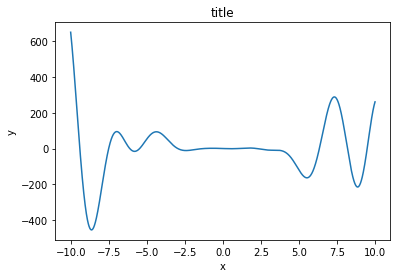

In [56]:
import matplotlib.pyplot as plt
def plot_f(a, b, f, eps, mark_points=[], xlabel='x', ylabel='y', title='title'):

  x_range = np.arange(a, b, eps)

  fig = plt.figure()
  
  # plt.annotate('local max', xy=(2, 100), xytext=(12, 1.5),
   #           arrowprops=dict(facecolor='black', shrink=0.05),
    #          )
  plt.plot(x_range, f(x_range))
  for point in mark_points:
    plt.plot(point[0], point[1], 'ro')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

  plt.show()

plot_f(a=-10, b=10, f=f, eps=0.01)

**1. Bisection Method**

{'x': 8.837890625, 'f(x)': -215.06007408195492}


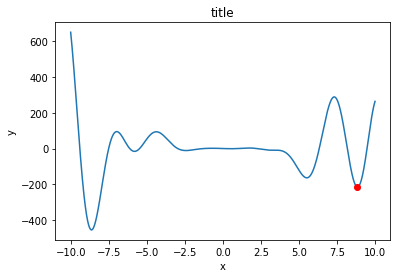

In [105]:
# Bisection Method
def bisection(a, b, eps, f):
  k = 0
  while abs(b-a) >= eps:
    x = (a+b)/2
    if f(x) > f(x+eps):
      a = x
    else:
      b = x
  return {
      'x' : x,
      'f(x)' : f(x)
  }

result = bisection(a=7.5, b=10, eps=0.01, f=f)
print(result)
plot_f(a=-10, b=10, f=f, eps=0.00001, mark_points=[[result['x'], result['f(x)']]])

**2. Golden Section Method**

{'x': 8.8434, 'y': 8.8452, 'f(x)': -215.0961, 'f(y)': -215.0998}


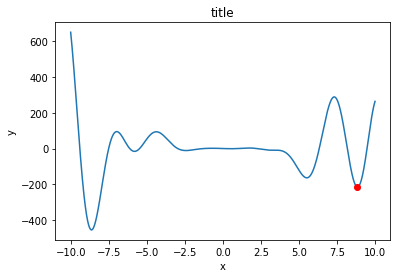

In [94]:
# Golden Section Method
def golden_section(a, b, eps, f):
  gama = (1 + math.sqrt(5)) / 2
  x = b - 1 / gama * (b-a)
  y = a + 1 / gama  * (b-a)
  fx = f(x)
  fy = f(y)

  while b-a >= eps:
    if fx > fy:
      a = x
      x = y
      fx = fy
      y = a + 1 / gama * (b-a)
      fy = f(y)
    else:
      b = y
      y = x
      fy = fx
      x = b - 1 / gama * (b-a)
      fx = f(x)
  
  return {
      'x' : round(x, 4),
      'y' : round(y, 4),
      'f(x)' : round(fx, 4),
      'f(y)' : round(fy, 4)
  }

result = golden_section(a=6, b=10, eps=0.01, f=f)
print(result)
plot_f(a=-10, b=10, f=f, eps=0.00001, mark_points=[[result['x'], result['f(x)']]])

**3. Newton’s Method**

{'x': 7.317837861367124, 'f(x)': 288.24834261535676, 'df': -0.0006828745631679567, 'k': 2}


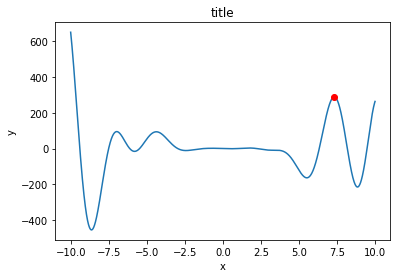

In [121]:
# Newton's Method
def newtons_method(x0, eps, df, d2f):
  x = [x0]
  k = 0
  while abs(df(x[k])) > eps:
    x_k1 = x[k] - df(x[k]) / d2f(x[k])
    x.append(x_k1)
    k += 1
  
  return {
      'x' : x[k],
      'f(x)' : f(x[k]),
      'df' : df(x[k]),
      'k' : k
  }

result = newtons_method(x0=7.5, eps=0.001, df=df, d2f=d2f)
print(result)
plot_f(a=-10, b=10, f=f, eps=0.001, mark_points=[[result['x'], result['f(x)']]])

**4. Secant Method**

8.727327605578838
8.844041515302976
8.846060183069559
8.846005445904028
{'x': 8.846005445904028, 'f(x)': -215.100151101482}


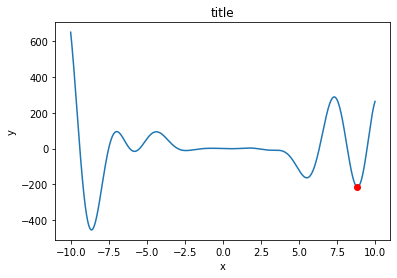

In [101]:
# Secant Method
def secant(x0, x1, eps, df):
  x = [x0, x1]
  dfx = [df(x0), df(x1)] 
  
  k = 1

  while abs(dfx[k]) > eps:
    x_k1 = x[k] - dfx[k] / (dfx[k] - dfx[k-1]) * (x[k] - x[k-1])
    x.append(x_k1)
    dfx.append(df(x_k1))
    k += 1
    print(x_k1)
  
  return {
      'x' : x[k],
      'f(x)' : f(x[k])
  }


result = secant(x0=8, x1=9, eps=0.001, df=df)
print(result)
plot_f(a=-10, b=10, f=f, eps=0.001, mark_points=[[result['x'], result['f(x)']]])